In [1]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tnrange

import torch
import torch.nn as nn
import numpy as np

from hydraml.model.self_supervised_learning.autoencoder.linear_autoencoder import LinearAutoencoder

In [2]:
batch_size = 128
img_transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = MNIST('./data', transform=img_transform, train=True, download=True)
test_dataset = MNIST('./data', transform=img_transform, train=False, download=True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [3]:
num_epochs = 20
learning_rate = 1e-3
input_size = 784

model = LinearAutoencoder(input_size).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5
)

In [4]:
model.fit(train_dataloader, num_epochs, optimizer, criterion, print_loss=False)

In [5]:
model.print_train_loss_history()

Epoch: 1 	Training Loss: 0.028488
Epoch: 2 	Training Loss: 0.026564
Epoch: 3 	Training Loss: 0.022502
Epoch: 4 	Training Loss: 0.020302
Epoch: 5 	Training Loss: 0.019261
Epoch: 6 	Training Loss: 0.019564
Epoch: 7 	Training Loss: 0.019878
Epoch: 8 	Training Loss: 0.016954
Epoch: 9 	Training Loss: 0.016229
Epoch: 10 	Training Loss: 0.016807
Epoch: 11 	Training Loss: 0.015517
Epoch: 12 	Training Loss: 0.014826
Epoch: 13 	Training Loss: 0.015823
Epoch: 14 	Training Loss: 0.015902
Epoch: 15 	Training Loss: 0.014833
Epoch: 16 	Training Loss: 0.015684
Epoch: 17 	Training Loss: 0.015557
Epoch: 18 	Training Loss: 0.014025
Epoch: 19 	Training Loss: 0.016046
Epoch: 20 	Training Loss: 0.013874


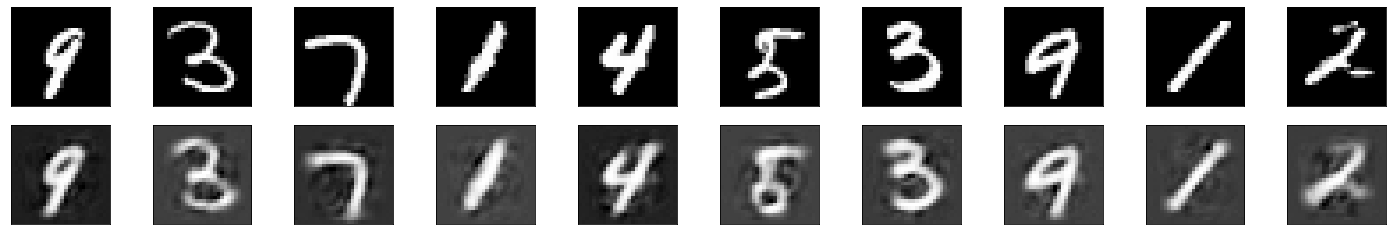

In [6]:
test_dataiter = iter(test_dataloader)
images, labels = test_dataiter.next()

images_flatten = images.view(images.size(0), -1).cuda()
output = model(images_flatten)
images = images.numpy()

output = output.cpu().view(batch_size, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

## References

- [Plot function to test](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/autoencoder/linear-autoencoder/Simple_Autoencoder_Solution.ipynb)